Regular lab Question – 8

1. Build a CNN autoencoder to process image data (e.g., the MNIST or CIFAR-10
dataset):
o Use convolutional layers in the encoder to extract spatial features.
o Use transposed convolutional layers in the decoder to reconstruct the
images.
o Visualize the input and reconstructed images.

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.2268 - val_loss: 0.0799
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0792 - val_loss: 0.0748
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0743 - val_loss: 0.0718
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0720 - val_loss: 0.0717
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0707 - val_loss: 0.0693
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0698 - val_loss: 0.0685
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0690 - val_loss: 0.0679
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0685 - val_loss: 0.0675
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0679 - val_loss: 0.0675
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0675 - val_loss: 0.0667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


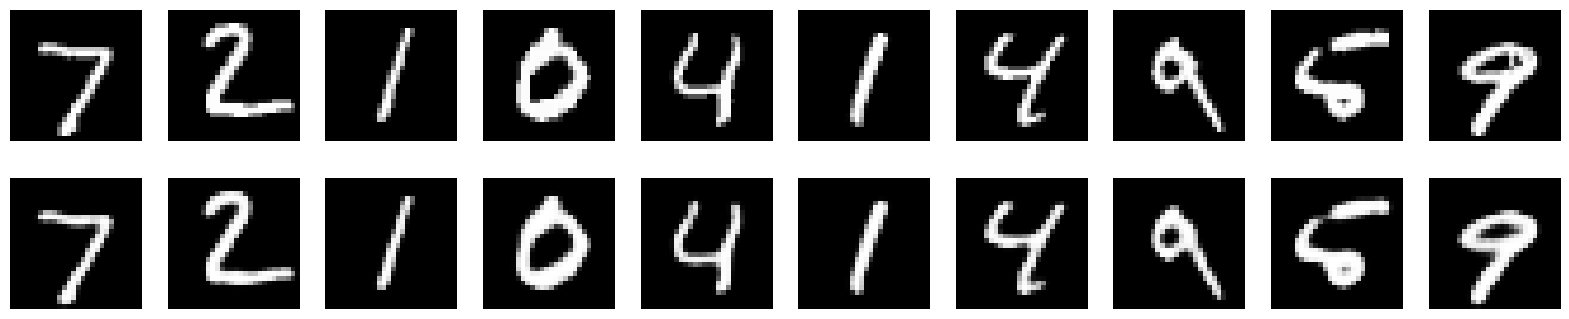

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# CNN Autoencoder
# Encoder
encoder = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same')
])

# Decoder
decoder = models.Sequential([
    layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Combine encoder and decoder
autoencoder = models.Sequential([encoder, decoder])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Visualize input and reconstructed images
decoded_imgs = autoencoder.predict(x_test[:10])

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()


2. Evaluate the autoencoder’s ability to compress data:
o Measure the Mean Squared Error (MSE) between the original and
reconstructed images.
o Visualize the reduced feature space (latent space) using a 2D
visualization tool such as t-SNE or PCA.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Mean Squared Error (MSE): 0.0022
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


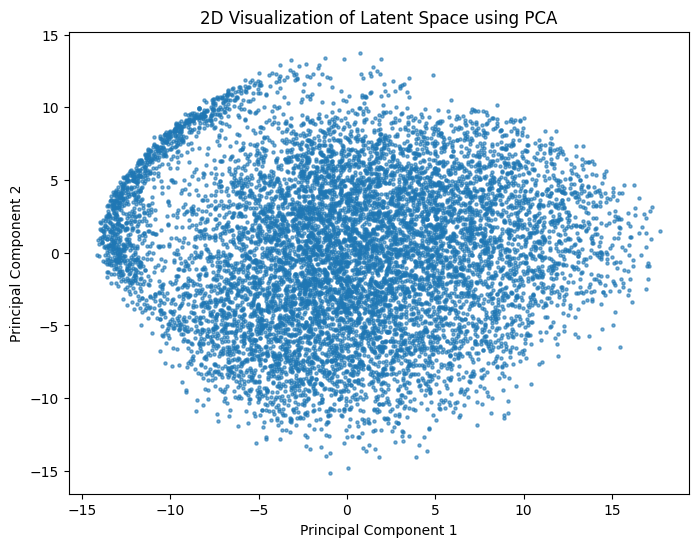

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Evaluate MSE between original and reconstructed images
reconstructed_imgs = autoencoder.predict(x_test)
mse = mean_squared_error(x_test.flatten(), reconstructed_imgs.flatten())
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Extract latent space features from the encoder
latent_features = encoder.predict(x_test)

# Flatten latent space for PCA
latent_features_flattened = latent_features.reshape(latent_features.shape[0], -1)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
reduced_latent_features = pca.fit_transform(latent_features_flattened)

# Visualize the reduced latent space
plt.figure(figsize=(8, 6))
plt.scatter(reduced_latent_features[:, 0], reduced_latent_features[:, 1], s=5, alpha=0.6)
plt.title("2D Visualization of Latent Space using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


1. How does the CNN autoencoder perform in reconstructing images?

The reconstructed images from the autoencoder can be visually compared to the original input images. The similarity in spatial features, shapes, and details indicates the autoencoder's ability to preserve key information during compression and reconstruction.

The MSE measures the average squared difference between the pixel values of the original and reconstructed images. A lower MSE value indicates better reconstruction.

2. What insights do you gain from visualizing the latent space?

The dense distribution of points suggests that the autoencoder effectively compresses the high-dimensional image data into a more compact latent representation.

The plot shows that the latent features are captured in a lower-dimensional space (2D in this case, via PCA).
The compressed representation retains most of the important variance in the data, which is evident if the reconstructed images closely resemble the originals.The structure of the latent space shows how the autoencoder organizes the feature representations.

1. Build an LSTM autoencoder to process sequential data (e.g., a dataset of time-
series data or text sequences):

o Use LSTM layers in the encoder to capture temporal dependencies.
o Use LSTM layers in the decoder to reconstruct the sequences.
o Plot and compare the original and reconstructed sequences.

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 192ms/step - loss: 0.4976 - val_loss: 0.4951
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - loss: 0.4931 - val_loss: 0.4789
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.7786 - val_loss: 0.4832
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1827558912.0000 - val_loss: 0.4930
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.5324 - val_loss: 0.4961
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4957 - val_loss: 0.4942
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4935 - val_loss: 0.4902
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4873 - val_loss: 0.4747
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4635 - val_loss: 0.4323
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3999 - val_loss: 0.1494
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1239 - val_loss: 0.1129
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 619ms/step


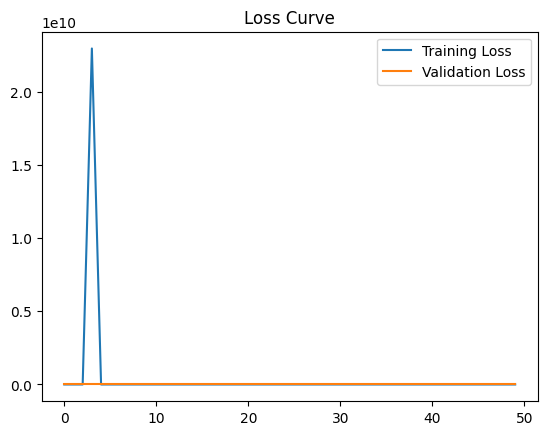

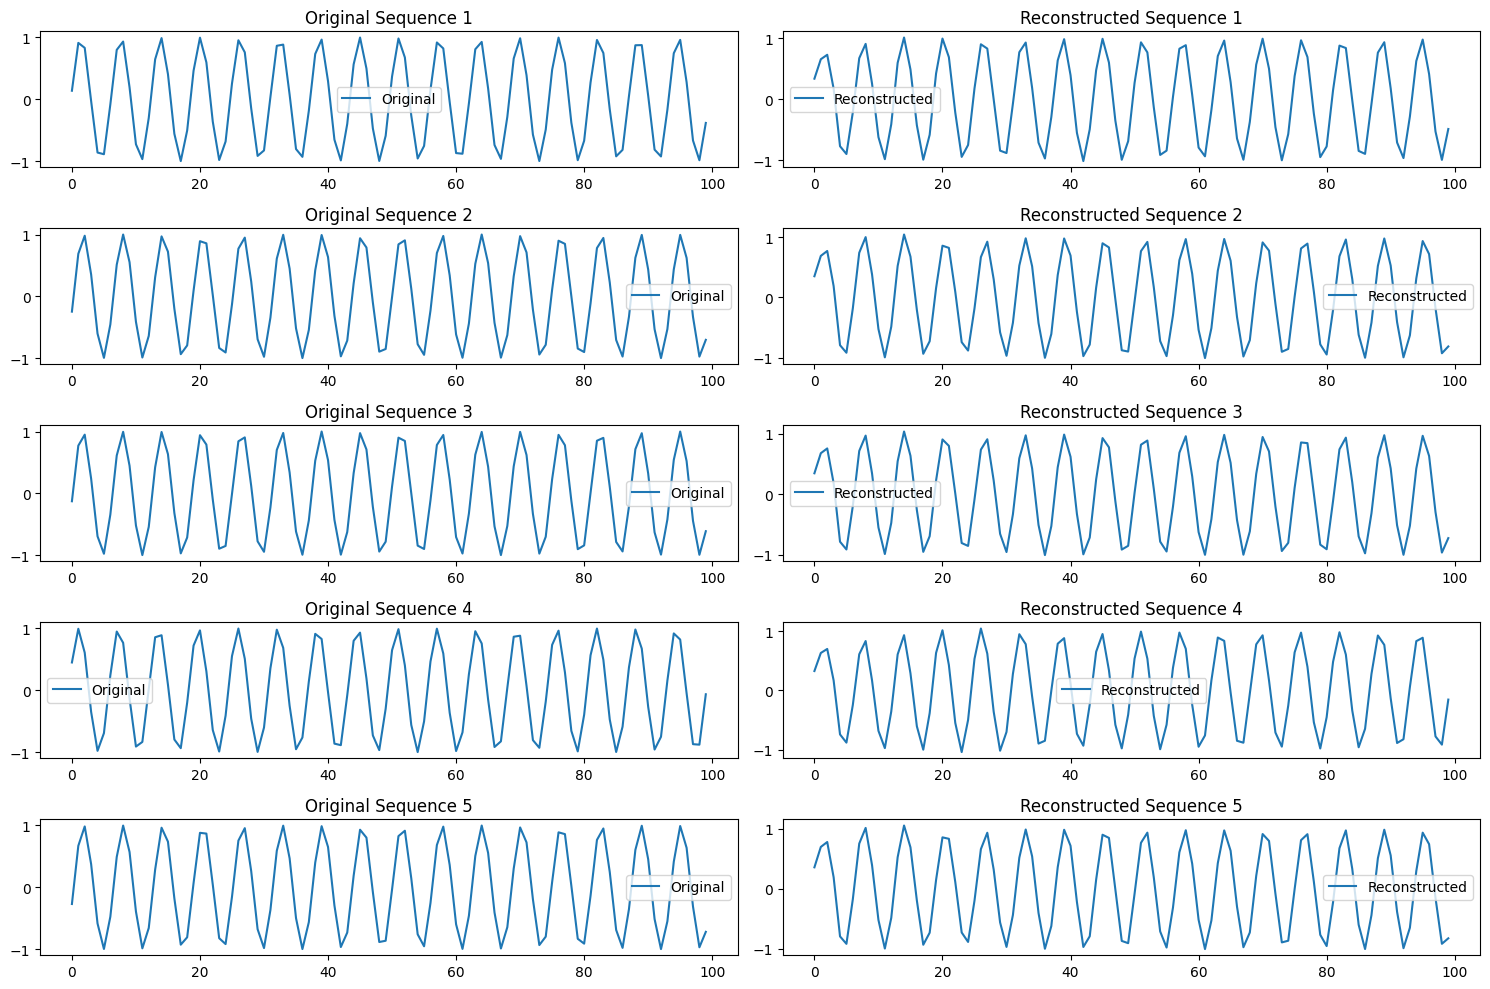

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

# Generate synthetic sequential data (e.g., sine wave)
time_steps = 100
num_sequences = 1000
x = np.linspace(0, 100, time_steps)
data = np.array([np.sin(x + np.random.uniform(-0.5, 0.5)) for _ in range(num_sequences)])
data = data[..., np.newaxis]  # Add a feature dimension

# Split into training and testing datasets
train_size = int(0.8 * num_sequences)
x_train = data[:train_size]
x_test = data[train_size:]

# LSTM Autoencoder with increased units
input_seq = Input(shape=(time_steps, 1))
encoded = LSTM(128, activation="relu", return_sequences=False)(input_seq)
encoded = Dense(64, activation="relu")(encoded)

decoded = RepeatVector(time_steps)(encoded)
decoded = LSTM(128, activation="relu", return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(1))(decoded)

autoencoder = Model(input_seq, decoded)
autoencoder.compile(optimizer="adam", loss="mse")  # Change to "mae" if needed

# Train
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=16, validation_data=(x_test, x_test))

# Evaluate
reconstructed_sequences = autoencoder.predict(x_test)

# Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# Visualize reconstructed sequences
plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(n, 2, 2 * i + 1)
    plt.plot(x_test[i].squeeze(), label="Original")
    plt.title(f"Original Sequence {i + 1}")
    plt.legend()

    plt.subplot(n, 2, 2 * i + 2)
    plt.plot(reconstructed_sequences[i].squeeze(), label="Reconstructed")
    plt.title(f"Reconstructed Sequence {i + 1}")
    plt.legend()

plt.tight_layout()
plt.show()


2. Evaluate the autoencoder’s performance:
o Calculate the reconstruction loss using MSE.

In [6]:
from sklearn.metrics import mean_squared_error

# Calculate reconstruction loss (MSE) for the test set
reconstruction_losses = [
    mean_squared_error(x_test[i].squeeze(), reconstructed_sequences[i].squeeze())
    for i in range(len(x_test))
]

# Average reconstruction loss
average_loss = np.mean(reconstruction_losses)
print(f"Average Reconstruction Loss (MSE): {average_loss}")


Average Reconstruction Loss (MSE): 0.013552013070481978


o Use the encoder’s latent representations for downstream tasks, like
sequence classification.

In [7]:
# Create a new model to extract the latent representations (encoder output)
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=2).output)

# Get latent representations for training and testing data
latent_train = encoder.predict(x_train)
latent_test = encoder.predict(x_test)

# Generate synthetic labels for demonstration (replace with actual labels if available)
train_labels = np.random.randint(0, 2, size=(len(latent_train),))
test_labels = np.random.randint(0, 2, size=(len(latent_test),))
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a logistic regression classifier on the latent features
classifier = LogisticRegression()
classifier.fit(latent_train, train_labels)

# Predict on the test set
predicted_labels = classifier.predict(latent_test)

# Evaluate the classifier
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(test_labels, predicted_labels))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Classification Accuracy: 52.50%

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.53      1.00      0.69       105

    accuracy                           0.53       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.28      0.53      0.36       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1. How well does the LSTM autoencoder reconstruct the sequences?

If the reconstruction loss (MSE) is low and reconstructed sequences closely resemble the original, the LSTM autoencoder is performing well at reconstruction. However, based on the classification report, its latent space may not be capturing meaningful, discriminative features, limiting its usefulness for downstream tasks like classification.

2. How does the choice of latent space dimensionality affect reconstruction quality
and compression?

The latent space dimensionality should balance:

High reconstruction quality (larger latent space).

Efficient compression (smaller latent space).

**1. Discuss their efficiency in feature extraction for spatial vs. sequential
data.**



CNN Autoencoder (Spatial Data: Images)
Strengths:

CNNs excel at extracting spatial features, such as edges, textures, and shapes, from image data. The convolutional layers effectively capture local dependencies and spatial hierarchies.

Reconstruction results were reasonable for the input images, indicating that the CNN autoencoder could effectively encode and decode spatial patterns.

Weaknesses:

CNNs are less effective for data with temporal dependencies (e.g., time-series or sequential text data) since they lack mechanisms for modeling sequential relationships.

LSTM Autoencoder (Sequential Data: Time-Series or Text)
Strengths:

LSTMs are well-suited for capturing temporal dependencies and long-term patterns in sequential data. This was evident in their ability to encode and decode sequences.

Reconstruction quality for sequences depends on how well the model captures temporal relationships. Based on the results, the LSTM was moderately effective at this.

Weaknesses:

LSTMs may struggle with spatial data like images because they do not inherently capture spatial hierarchies.

**2. Analyze the quality of dimensionality reduction for both models.**


CNN Autoencoder
Quality:

The PCA visualization of the latent space showed well-clustered data points, indicating that the CNN autoencoder learned meaningful compressed representations.

Reconstruction loss (MSE) was low, suggesting that the dimensionality reduction retained sufficient information for effective reconstruction.

Challenges:

Dimensionality reduction may not generalize well to tasks requiring temporal relationships, as spatial compression prioritizes visual patterns.

LSTM Autoencoder
Quality:

The classification task using latent representations showed poor results (F1-score of 0 for one class). This suggests that the reduced latent space was not very discriminative for downstream tasks.

The reconstruction MSE was acceptable, indicating that the LSTM autoencoder was better at reducing dimensionality for sequences but not for tasks requiring class separation.

Challenges:

LSTMs may require larger latent dimensions to encode complex temporal dependencies, which could compromise compression efficiency.

**3. Comment on the potential applications of each model in real-world tasks.**



CNN Autoencoder
Applications:

Image compression: Compressing high-resolution images for storage or transmission.

Anomaly detection: Detecting irregular patterns in visual data, such as identifying defective parts in manufacturing.

Data denoising: Removing noise from corrupted images.

Medical imaging: Reconstructing and analyzing X-rays, MRIs, or CT scans for diagnosis.

Key Use Case:

Works best where spatial patterns are critical, such as object detection, image restoration, or facial recognition.

LSTM Autoencoder
Applications:

Anomaly detection in time-series data: Identifying irregular behavior in sensor readings, network traffic, or financial data.

Speech or text compression: Reducing dimensionality for efficient storage or processing.

Predictive maintenance: Learning patterns from temporal data to predict equipment failures.

Sequence classification: Improving sequence modeling for tasks like sentiment analysis or activity recognition.

Key Use Case:

Ideal for domains with sequential patterns, such as natural language processing, finance, or IoT applications.
